 Задача: проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи (доставка по пути домой)
 на всех курьеров.

In [2]:
import pandas as pd
import scipy.stats as st
import seaborn as sns

In [3]:
df=pd.read_csv('experiment_lesson_4.csv')

In [4]:
df.head()

order_id  delivery_time  district experiment_group
0      3159           44.0  Purlieus          control
1     10426           51.0  Purlieus          control
2      9155           46.0  Purlieus          control
3     10699           34.0  Purlieus          control
4     10061           43.0  Purlieus          control

In [5]:
df.isnull().sum(axis=0)

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

In [6]:
df.dtypes

order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object

In [7]:
df.describe()

order_id  delivery_time
count  20196.000000   20196.000000
mean   11103.503565      42.054169
std     5835.424404      10.382196
min     1000.000000      10.000000
25%     6048.750000      35.000000
50%    11109.500000      42.000000
75%    16158.250000      49.000000
max    21207.000000      83.000000

In [8]:
#Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет.
#Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть.

In [9]:
#Посмотрим на распределения по районам в тестовой и контрольной группах

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

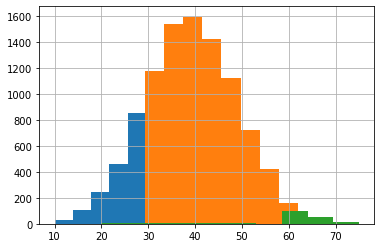

In [10]:
df.query('experiment_group == "test"').groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

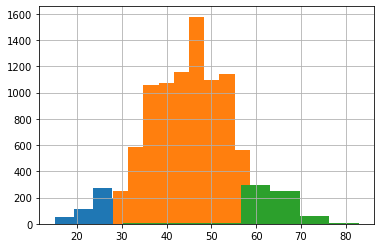

In [11]:
df.query('experiment_group == "control"').groupby('district').delivery_time.hist()

In [12]:
df.query('experiment_group == "control"').order_id.nunique() - df.query('experiment_group == "test"').order_id.nunique()

-12

In [13]:
#Проведем тест Шапиро-Уилка для проверки распределений на нормальность

In [14]:
sample_test=df[df['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)

In [15]:
st.shapiro(sample_test) 

(0.9975475668907166, 0.14005419611930847)

In [16]:
#Распределение нормально.
#Найдем так же стандартное отклонение:

In [17]:
round(df.query('experiment_group =="control"').delivery_time.std(),2)

9.99

In [18]:
sample_control=df[df['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17)

In [19]:
st.shapiro(sample_control)

(0.9974725842475891, 0.12411931157112122)

In [20]:
#Распределение нормально.
#Найдем так же стандартное отклонение:

In [21]:
round(df.query('experiment_group =="test"').delivery_time.std(),2)

9.88

In [22]:
#Теперь можно воспользоваться Т-тестом для сравнения средних в контрольной и тестовой группах.

In [23]:
st.ttest_ind(df.query('experiment_group =="control"').delivery_time, df.query('experiment_group =="test"').delivery_time)

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

In [24]:
#По результатам Т-теста можно сказать, что средние в группах статистически значимо отличаются.

In [25]:
round(100*(df.query('experiment_group =="test"').delivery_time.mean()-df.query('experiment_group =="control"').delivery_time.mean()) / df.query('experiment_group =="control"').delivery_time.mean() ,2)

-13.35

При проведении А/B  тестирования нам удалось получить статистически значимый результат. Мы принимаем альтернативную гипотезу о не равенстве седних. Среднее время в контрольной тестовой группах отличается на -13%. То есть новая фича позволяет сократить время доставки на 13%.